# 数组

线性代数是计算数学最重要的组成部分之一。线性代数的研究对象是向量和矩阵。``NumPy`` 包含有所有用来处理这些对象的必备工具。

- 构建矩阵和向量，或者通过切片来更改它们。
- ``dot``运算，包括了标量积、矩阵--向量乘积和矩阵-矩阵乘积 

## 数组类型概要

简而言之，这部分介绍如何在 nutshell中使用数组。

### 向量和矩阵

创建向量就像使用函数 array将列表转换为数组一样简单：

```python
v = array([1., 2., 3.])
```

对象v现在是一个向量，其行为很像线性代数中的向量。以下是一些在向量上执行的基本线性代数运算的例子：

In [1]:
from numpy import *
from scipy import *
from scipy.linalg import *
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
# two vectors with three components
v1 = array([1., 2., 3.]) 
v2 = array([2, 0, 1.]) 

2*v1      # array([2., 4., 6.])
v1/2      # array([0.5, 1., 1.5])

array([0.5, 1. , 1.5])

In [3]:
# linear combinations
3*v1 #  array([ 3.,  6.,  9.])
3*v1 + 2*v2  # array([  7.,   6.,  11.])
# norm
norm(v1) #  3.7416573867739413
# scalar product
dot(v1, v2) # 5.
v1 @ v2     #  5 ; alternative formulation 

5.0

In [4]:
# elementwise operations:
v1 * v2 # array([2., 0., 3.])
v2 / v1 # array([2.,0.,.333333])
v1 - v2 # array([-1.,  2.,  2.])
v1 + v2 # array([ 3.,  2.,  4.])

array([3., 2., 4.])

一些函数对于数组也是作用于元素上的：

In [5]:
cos(v1) # cosine, elementwise: array([ 0.5403, -0.4161, -0.9899])

array([ 0.54030231, -0.41614684, -0.9899925 ])

矩阵是用类似于创建向量的方式创建的，而不是通过一系列的列表来创建的：

In [6]:
M = array([[1.,2],[0.,1]])

创建一个与向量 ``` v=array([1., 2., 1.])``` 包含相同数据的行矩阵

In [7]:
R = array([[1.,2.,1.]])  # Note the brackets
shape(R)                 # (1,3)   row matrix column matrix

(1, 3)

使用 ```reshape``` 方法，获得对应的列矩阵

In [8]:
C = array([1., 2., 1.]).reshape(3,1)  
shape(C)        #(3,1)  : column matrix

(3, 1)

### 索引和切片
索引和切片与列表的索引和切片类似. 两者主要的区别是当数组是一个矩阵时，可能会有多个索引或切片.
这里仅给出一些索引和切片的实例

In [9]:
v = array([1., 2., 3])
M = array([[1., 2.],[3., 4.]])
v[0]      # 1.0
v[1:]     # array([2., 3.])

M[0, 0]   # 1.
M[1:]     # array([4., 5., 6.])
M[1]      # array([4., 5., 6.])

array([3., 4.])

In [10]:
# 访问
v[0]    #1.
v[0] = 10

# slice
v[:2]   #array([10.,  2.])
v[:2] = [0,1]  #now v== array([0., 1., 3.])

v[:2] = [1,2,3]  #error

ValueError: cannot copy sequence with size 3 to array axis with dimension 2

### 线性代数运算
```dot```函数是执行大多数常见线性代数运算的基本运算符,它可以用于矩阵-向量乘法.

In [11]:
M = array([[1., 2., 3.],[4., 5.,6.]])
v = array([0., 1., 3.])
dot(M,v)   #  array([11., 23.])
M @ v       # array([11., 23.]) ; alternative formulation 


array([11., 23.])

用来计算两个向量之间的标量乘积

In [12]:
w = array([1., 2., 1.])
v = array([0., 1., 3.])
dot(v,w)   #5.0  Scalar product
v@w        # 5.0   alternative formulation 


5.0

计算矩阵--矩阵乘积

In [13]:
N = array([[10.,1.],[1., 3.],[2.,2]])
dot(M,N)           #array([[18., 13.],[57., 31.]])
M @ N              # array([[18., 13.], [57., 31.]])  alternative formulation 

array([[18., 13.],
       [57., 31.]])

#### 求解线性方程组
$A$ 是一个矩阵, $b$ 是一个向量,可以求解线性方程
$$ Ax = b$$
可以使用```solve```方法, 语法如下
```python
solve(A,b)
```
例:
$$ \begin{cases}x_1+2x_2=1, \\ 3x_1+4x_2=4.\end{cases}$$

In [14]:
A= array([[1., 2.],[3., 4.]])
b = array([1., 4.])
x = solve(A,b)      # [ 2.  -0.5]
allclose(dot(A,x),b)   # True
allclose(A @ x,b)   # True;  alternative formulation 

True

- `` allclose`` 用于比较两个向量.如果它们彼此足够接近,那么该命令将返回 ``True``.

## 数组类型
NumPy中用于操纵向量、矩阵以及更多用于张量的对象称为数组。

### 数组属性

数组本质上具有3个属性

| 名称 |     说明 |
| :--- | :--- |
| shape| 它描述了如何将数据解释为向量、矩阵或高阶张量，并给出了相应的维度。可以使用shape属性访问它|
| dtype | 它给出了底层数据的类型(浮点数、复数、整数等)|
|strides|此属性指定了应读取数据的顺序。例如，矩阵可以逐列(FORTRAN语言约定)或逐行(C语言约定)存储。属性是-个元组，其必须在内存中跳过一定的字节数才能到达下行或下一列。strides属性甚至允许对内存中的数据进行更灵活的解释，这使得数组视图成为可能.|


In [15]:
A = array([[1, 2, 3],[3,4, 6]])
A.shape    # (2， 3)
A.dtype    # dtype(' int64')

A.strides   # (24， 8)

(24, 8)

该数组的元素类型为'int64'，也就是说，它们占用了64位或者8字节大小的内存。完整的数组以行的方式存储在内存中。从$A[0,0]$到下一行 $A[1,0]$ 中的第一个元素的距离占用了24字节的内存(3个矩阵元素)。相应地，$A[0,0]$ 和 $A[0,1]$ 之间占用了8字节的内存(一个矩阵元素)。这些值均存储在属性strides中。

### 用列表创建数组

函数array是创建数组的常用语法。创建一个实数向量的语法如下:
``` 
V = array(11., 2., 1.1, dtype-float)
```
要创建个与上面的数组具有相同数据的复数向量，
```
V = array(11., 2., 1.1， dtype-complex) 
```
若没有指定类型,则需要推测类型. `` array``函数会选择能够存储所有指定值的数据类型:

In [16]:
V = array([1, 2]) # [1, 2] is a list of integers
V.dtype # int64

V = array([1., 2]) # [1., 2] mix float/integer
V.dtype   # float64

V = array([1. + 0j, 2.]) # mix float/complex
V.dtype # complex128

dtype('complex128')

#### 默认类型转换

``NumPy`` 默认将浮点数转换为整数，这可能会产生意想不到的结果:

In [17]:
 a = array([1, 2, 3])
 a[0] = 0.5 
 a   # now: array([0, 2, 3])

array([0, 2, 3])

#### 数组和Python圆括号

当一些左大括号或圆利括号未关闭时，Python 允许使用一个换行符。这为数组创建提供了便捷的语法。该语法使得数组的创建更为友好。

In [18]:
# the identity matrix in 2D
Id = array([[1., 0.], [0., 1.]])
# Python allows this:
Id = array([[1., 0.],
            [0., 1.]])
# which is more readable

## 访问数组项

可以通过索引来访问数组项。与向量系数不同，我们需要两个索引来访问矩阵系数。这些索引都在一对 方括号中给出，这样就能将数组语法与一系列列表语法 ( 需要两对方把号来访问元素)区分开来。

In [19]:
M = array([[1., 2.],[3.,4.]])
M[0,0] # first row, first column: 1.

M[-1,0] # last row, first column: 3.

3.0

### 基本数组切片

数组切片与列表切片类似，但其可能存在多个维度。
* $M[i，...]$ 是由 $M$ 的 $i$ 行所填充的向量。
* $M[:,j]$ 是由 $M$ 的 $j$ 列所填充的向量。
* $M[2: 4，...]$ 是仅在行上的 $2:4$ 的切片。
* $M[2: 4,1: 4]$ 是行和列的切片。

删除维度: 如果删除了一个索引或切片，NumPy会假定你只取行。$M[3]$ 是 $M$ 的第三行视图的向量，$M[1:3]$ 是 $M$ 的第二行和第三行的视图的矩阵。

改变切片的元素会影响整个数组:

In [20]:
v = array([1., 2., 3.])
v1 = v[:2] # v1 is array([1.,2.])
v1[0] = 0.  # if v1 is changed ...

v #   ... v is changed too: array([0., 2., 3.])

array([0., 2., 3.])

一般的切片规则

|访问方式 | 维数 | 类型 |
|:---:| :---: | :---:|
|index, index   |  0   |scalar|
|slice,index|    1 |vector|
|index,slice|    1 | vector |
|slice,slice|    2 | matrix|

形状为 $(4,4)$ 的数组 $M$ 的切片运算结果:

|访问方式 | 形状 | 维数 | 类型 |
| :---: | :---: | :---:| :---:|
| M[:2,1:-1] |(2,2) |2 |matrix |
| M[1,:] |(4) |1 |vector |
| M[1,1] |() |0 |scalar |
| M[1:2,:] |(1,4)|2 |matrix |
| M[1:2,1:2] |(1,1) |2 |matrix |


### 使用切片修改数组

可以通过使用切片或直接访问来修改数组。下面仅更改了5X3矩阵M中的一个元素:

In [21]:
M = array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])
shape(M)     # (5, 3)

M[1,2] = 2.0 # scalar
M     # array([[ 1,  2,  3], [ 4,  5,  2],[ 7,  8,  9], [10, 11, 12],[13, 14, 15]])

array([[ 1,  2,  3],
       [ 4,  5,  2],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

也可以修改矩阵的一整行:

In [22]:
M[2,:] = [1.,2.,3.] # vector
# array([[ 1,  2,  3],[ 4,  5,  2],[ 1,  2,  3],[10, 11, 12],[13, 14, 15]])

也可以替换整个子矩阵:

In [23]:
M[1:3,:] = array([[1.,2.,3.],[-1.,-2.,-3.]]) # matrix
 #array([[ 1,  2,  3],[ 1,  2,  3],[-1, -2, -3],[10, 11, 12],[13, 14, 15]])

列矩阵和向量不同。以下使用列矩阵的赋值不会返回错误:

In [24]:
M[1:4,2:3] = array([[1.],[0.],[-1.0]]) # column matrix
M   # array([[ 1,  2,  3], [ 1,  2,  1],[-1, -2,  0],[10, 11, -1],[13, 14, 15]])

array([[ 1,  2,  3],
       [ 1,  2,  1],
       [-1, -2,  0],
       [10, 11, -1],
       [13, 14, 15]])

而以下使用向量的赋值将返回一个Value Error:

In [25]:
M[1:4,2:3] = array ( [1., 0., -1.0]) # error

ValueError: could not broadcast input array from shape (3) into shape (3,1)

## 数组构造函数

我们一般通过列表来构建数组，但还有一些便捷的方法可用来生成特殊的数组， 见表.

|方法 |形状 | 生成结果 |
| :--- | :--- | :--- |
| zeros((n,m)) |(n,m)| 由zeros填充的矩阵 |
| ones (n,m) | (n,m) | 由ones填充的矩阵 |
| diag(v,k) | (n,n) | 来自向量vV的对角矩阵(Sub-,super-) |
|random.rand (n,m) | (n,m) | 由在(0,1)中平均分布的随机数填充的矩阵|
| arange (n) | (n,) | 前n个整数|
|linspace(a,b,n) | (n,) | 由平均分布在 a 和 b 之间的 n 个点所组成的向量|

这些命令可以采用额外的参数。特别是命令 ``zeros``, ``ones`` 和 ``arange`` 采用 dtype 作为可选参数. 

除 ``arange`` 之外，默认类型型均为 float . 还有诸如 ``zeros_like`` 和 ``ones_like`` 的方法，它们是上述命令的此变体，例如，``zeros_like(A)`` 方法相当于 ``zeros(shape(A))``。

如下是函数identity,它构造了一个指定大小的单位矩阵:

In [26]:
identity(3)  # array([[1., 0., 0.],[0., 1., 0.],[0., 0., 1.]])

I = array([[1., 0., 0.],[0., 1., 0.],[0., 0., 1.]])  

## 访问和修改形状

向量和矩阵的区别在于维数，不同大小的向量或矩阵的主要区别在于形状。

### shape函数

矩阵的形状是其维度的元组。$n\times m$ 矩阵的形状是元组 (n,m)，该元组可以通过shape函数获得:

In [27]:
M = identity(3)
shape(M) # (3, 3)

(3, 3)

对于一个向量来说，其形状是包含该向量长度的单元素元组:

In [28]:
v = array([1., 2., 1., 4.])
shape(v) # (4,) <- singleton (1-tuple)

(4,)

另一种方法是使用数组属性shape,它可以得到相同的结果:

In [29]:
M = array([[1.,2.]])
shape(M) # (1,2)
M.shape # (1,2)

(1, 2)

但是将shape用作函数的优点是可以在标量和列表上使用该函数。当代码需要同时使用标量和数组时，该函数可能会派上用场:

In [30]:
shape(1.) # ()

shape([1,2]) # (2,)

shape([[1,2]]) # (1,2)

(1, 2)

### 维数

使用函数``numpy.ndim``或数组属性``ndarray.ndim``可以获取数组的维数:

In [31]:
A=random.rand(2,3)
ndim(A) # 2
A.ndim # 2

2

注意，张量 T (向量、矩阵或更高阶张量)的函数 ``ndim`` 给出的维数总是等于其形状的长度:

In [32]:
T = zeros((2,2,3)) # tensor of shape (2,2,3); three dimensions
ndim(T) # 3

len(shape(T)) # 3

3

### 重塑

``reshape`` 函数在不复制数据的情况下给出了一个数组的新视图，它有一个新形状:

In [33]:
v = array([0,1,2,3,4,5])
M = v.reshape(2,3)   # array([[0, 1, 2], [3, 4, 5]])
shape(M)  # returns (2,3)
M[0,0] = 10 # now v[0] is 10
v   # array([10,  1,  2,  3,  4,  5])

array([10,  1,  2,  3,  4,  5])

### 重塑而不复制

重塑不是创建一个新数组，而是给出了现有数组的一个新视图。在前面的例子中，更改M的一个元素导致 v 中相应的元素也会自动地发生改变。当这种行为不被接受时，你就需要复制数据


如果要尝试重塑不与初始形状值相乘的形状的数组，则会引发错误:

``ValueError: total size of new array must be unchanged.``

有时候仅指定一个形状参数也很方便，并让Python以与原始形状相乘的方式来确定另一个形状参数。这可以通过设置自由形状参数-1来实现:


In [34]:
v = array([1,2,3,4,5,6,7,8])
M = v.reshape(2,-1)  # array([[1, 2, 3, 4],[5, 6, 7, 8]])
shape(M)   # returns (2,4)

M = v.reshape(-1,2)   # array([[1, 2],[3, 4],[5, 6],[7,8]])
shape(M)   # returns (4,2)

M = v.reshape(3,-1) # returns error 

ValueError: cannot reshape array of size 8 into shape (3,newaxis)

### 转置
转置是一种特殊格式的重塑， 它仅切换了矩阵的两个形状元素。矩阵A的转置矩阵是如下的矩阵B:
$$ B_{ij} = A_{ji} $$
这可以通过如下方式来实现:

In [35]:
A = random.rand(3,4)
shape(A)    # (3,4)
B = A.T     # A transpose
shape(B)    # (4,3)

(4, 3)

转置而不复制

转置与重塑非常类似，尤其是它不复制数据，而只是返回一个相同数组的视图。

In [36]:
A = array([[1.,2.],[3.,4.]])
B = A.T          # array([[1., 3.], [2., 4.]])
A[1,1] = 5.
B[1,1]           # 5.

5.0

由于向量是一维的张量， 也就是一个变量的函数，因此转置向量是没有意义的。然而，``NumPy`` 将遵循返回一个完全相同的对象:

In [37]:
v = array([1.,2.,3.])
v.T       # exactly the same vector!

array([1., 2., 3.])

转置一个向量时，所能想到的可能是创建一个行数组或列数组。这是通过使用``reshape``函数来实现的:

In [38]:
v.reshape(-1,1) # column matrix containing v 
                # array([[1.],[2.],[3.]]) 
v.reshape(1,-1) # row matrix containing v
                # array([[1., 2., 3.]])

array([[1., 2., 3.]])

## 叠加

用一对相匹配的子矩阵来构建矩阵的通用方法是``concatenate``, 其语法是:
```
concatenate( (a1，a2， . . .)，axis = 0)
```
当参数 axis = 0 时，此命令将垂直叠加子矩阵(在彼此的顶部)。而参数 axis = 1 时，子矩阵将水平叠加，这也适用于具有更多维度的数组。该函数可以通过以下的便捷函数来调用。

* hstack: 用于水平叠加矩阵。

* vstack;用于垂直叠加矩阵。

* columnstack: 用于在列中叠加向量。


### 叠加向量
可以使用``vstack``函数和``column_stack``函数来逐行或逐列叠加向量.


将偶排列作为向量堆叠的一个例子来考虑: 假没有一一个长度为2n的向量，要对具有偶数个分量的向量执行偶排列，也就是说，将符号变化的向量的前半部分和后半部分进行交换:

该运算在Python中的实现如下:

In [39]:
v1 = array([1.,2.])
v2 = array([3.,4.])
vstack([v1,v2])    # array([[1., 2.], [3., 4.]])
column_stack([v1,v2])  # array([[1., 3.], [2., 4.]])

array([[1., 3.],
       [2., 4.]])

将偶排列作为向量堆叠的一个例子来考虑: 假没有一个长度为 2n 的向量，要对具有偶数个分量的向量执行偶排列，也就是说，将符号变化的向量的前半部分和后半部分进行交换:
$$  (x_1,x_2,\cdots,x_n,x_{n+1},\cdots,x_{2n}) \mapsto (x_{n+1},\cdots,x_{2n},-x_1,\cdots,-x_n)  $$

该运算在Python中的实现如下:

In [40]:
# v is supposed to have an even length.
def symp(v):
  n = len(v) // 2 # use the integer division //
  return hstack([v[-n:], -v[:n]])
v = arange(1,5)
symp(v)   # array([ 3,  4, -1, -2])

array([ 3,  4, -1, -2])

## 作用于数组的函数

有许多不同类型的函数可作用于数组。有些函数是基于元素的，它们返回一个与原数组具有相同形状的数组，被称为通用函数。其他数组函数则返回一个具有不同形状的数组。
### 通用函数

通用函数是作用于数组元素的函数，因此它们具有与输入数组形状相同的输出数组。这些函数能让我们一次性计算出整个数组中的标量函数的结果。

1.内置通用函数

一个典型的示例是cos函数(由NumPy提供);

In [41]:
cos(pi) # -1.
cos(array([[0, pi/2, pi]])) # array([[ 1.000000e+00,  6.123234e-17, -1.000000e+00]]) = array([[1, 0, -1]])

array([[ 1.000000e+00,  6.123234e-17, -1.000000e+00]])

注意，通用函数以单元素方式作用于数组。乘法或指数等运算符也是如此:

In [42]:
2 * array([2, 4]) # array([4, 8])
array([1, 2]) * array([1, 8]) # array([1, 16])
array([1, 2])**2 # array([1, 4])
2**array([1, 2]) # array([2, 4])
array([1, 2])**array([1, 2]) # array([1, 4])

array([1, 4])

2. 创建通用函数

如果在函数中仅使用通用函数，那么它将自动成为通用函数。但是，如果函数使用了不通用的函数，那么在尝试将它们应用于数组时，可能会得到标量结果，甚至发生错误:


In [43]:
def const(x):
    return 1
const(array([0, 2])) # returns 1 instead of array([1, 1])

1

另一个实例如下:

In [44]:
def heaviside(x):
    if x >= 0:
        return 1.
    else:
        return 0.
heaviside(array([-1, 2])) # error

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

可预见的行为是作用于向量[a，b]的``heaviside``函数将返回``[heaviside(a)，heaviside (b) ]``。但这样也没用，因为不论输入的参数的大小，该函数总是返回个标量。

此外，使用数组作为输入的函数会引发异常。

NumPy包的函数``vectorize``使我们能够快速解决这个问题:

In [45]:
vheaviside = vectorize(heaviside)
vheaviside(array([-1,2])) # array([0,1]) as expected

array([0., 1.])

该方法的典型应用是其在绘图函数中的使用:

[-1.5, 1.5, -0.5, 1.5]

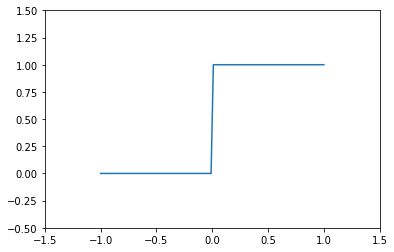

In [46]:
xvals=linspace(-1,1,100)
plot(xvals,vectorize(heaviside)(xvals))
axis([-1.5,1.5,-0.5,1.5])

Note: ``vectorize``函数不会提升性能，它仅为函数转换提供了一种方便快捷的方法，使其能够作用于列表和数组上的元素。

### 数组函数
有许多作用于数组(而不是作用于元素)的函数，例如``max、min`` 和``sum``,这些函数能以行或列的方式作用于整个矩阵。当没有提供任何参数时，它们将作用于整个矩阵。假设A是如下矩阵:
\begin{align}
1 \quad 2 \quad 3 \quad 4\\
5 \quad 6 \quad 7 \quad 8
\end{align}
作用在该矩阵上的sum函数返回了一个标量:

In [47]:
A = arange(1,9).reshape((2,-1))
sum(A) # 36

36

该命令有一个可选参数 axis, 该参数能让我们选择沿着哪个轴来执行运算。
例如, 如果``axis``为 0，则表示应该沿着第一个轴来计算总和。 沿着形状为(m, n)数组的轴 0 所计算的总和是一个长度为 n 的向量。

假设沿着轴0来计算矩阵A的总和:(这相当于计算列上的总和,其结果是一个向量.)


In [48]:
sum(A, axis=0) # array([ 6,  8, 10, 12])

array([ 6,  8, 10, 12])

假设沿着轴1来计算矩阵A的总和:(这相当于计算行上的总和,其结果是一个向量)


In [49]:
A.sum(axis=1) # array([10, 26])

array([10, 26])

## SciPy中的线性代数方法

``SciPy``在``scipy. linalg``模块中提供了大量的数值线性代数方法，其中许多方法都是封装自**LAPACK库**的Python程序。LAPACK库是一一个 良好的可用于求解线性方程组和特征值问题的FORTRAN子程序集合。线性代数方法是科学计算中所有方法的核心，并且SciPy使用包装程序(wrappers) 而不是纯Python 代码，使得这些核心方法运算非常快。



### 使用 LU 来求解多个线性方程组
令 **A** 为 $n\times n$ 矩阵， $b_1,b_2,\cdots,b_k $ 为 n 向量序列。 我们来考虑如何找到 n 个向量 $x_i$ 使得:
$$Ax_i =b_i$$
同时假设向量$b_i$未知，尤其是在$b_{i+1}$可用之前必须解决第$i$个问题是一个很常见的情况。

**LU分解**是一种用如下方式来组织的经典高斯消元法，其计算分两步实现。
* 执行矩阵 **A** 的分解步骤，从而获得一个三角形矩阵。

* 执行作用于 $b_i$ 的相对廉价的后向和前向消元步骤，并能从更耗时的因式分解步骤中受益。

该方法还使用了以下事实:如果**P**是一个序列矩阵，那就使得**PA**是行序列改变的初始矩阵。


如下两个方程组 ${\bf{A}}x= b$ 和 ${\bf{PA}}x={\bf{P}}b$ 的解法相同。

**LU分解**找到一个序列矩阵 **P**、一个下三角矩阵 **L** 和一个上三角矩阵 **U**，使得 **PA=LU** 或 **A** = **PLU**.

这样的分解总是存在的，与此同时，还可以用 $L_{ii}= 1$ 的方法来确定 **L**。因此，必须存储的来自 **L** 的基本数据是 ${\bf{L}}_{ij}(i>j)$. **L** 和 **U** 可以一起存储在 $n \times n$ 数组中，而存储序列矩阵 **P** 的信息只需要一个 n 整数向量即轴向量来完成。


在SciPy中，有两种计算LU分解的方法，其中标准的方法是scipy. linalg.lu,该方法将返回3个矩阵L、U和P。另一种方法是lu_ factor, 我们在这里说明这个方法是因为它在稍后与lu_ solve方法结合起来使用的话会很方便:
```python
import scipy.linalg as sl
[LU,piv] = sl.lu_factor(A)
```

In [50]:
import scipy.linalg as sl
A = array([[1,2], [-6,4]])
[LU,piv] = sl.lu_factor(A)
# LU = array([[-6.,4. ],[-0.16666667,  2.66666667]])
#  piv = array([1, 1], dtype=int32)

**A**矩阵在这里被分解，并且返回具有关于 **L** 和**U**的信息的数组以及轴向量。利用该信息，我们可以根据存储在轴向量中的信息来执行向量 $b_i$ 的行交换，并使用 **U** 进行后向替换，最后使用 **L** 进行前向替换来求解该方程组。

这在 **Python** 中是以方法 ``lu_solve`` 捆绑的。以下代码片段展示了一旦执行 **LU** 分解并将其结果存储在元组 (LU，piv) 中的情况下，方程组 $Ax_i= b_i$ 的求解方法:
```python
import scipy.linalg as s1
xi = sl,lu_ solve((LU, piv), bi)
```

In [51]:
bi = array([1,1])
xi=sl.lu_solve((LU,piv),bi)
xi   # array([0.125 , 0.4375])

array([0.125 , 0.4375])

### 使用 SVD 来解决最小二乘问题

线性方程组 $Ax=b$ (其中 A 为 $m\times n$ 矩阵且 $m>n$ )被称为***超定线性方程***。

通常该方程组没有经典解法，并且要寻求一个带有如下属性的向量 $x^*\in \mathbb{R}^n$:

$$\|Ax^* - b\|_2 = \min\|Ax-b\|_2$$

这里 $\| \cdot\|$ 表示欧几里德向量范数 $\|v\|_2 \sqrt{(\sum_{i=1}^n v_i^2)}. $


该问题称为**最小二乘的问题**。

一个稳妥的求解方法是基于分解 $A = U\sum V^{\top}$,其中 U 是一个 $m\times m$ 正交矩阵，V 是一个 $n\times n$ 正交矩阵，$\sum =(\sigma_{ij})$ 是一个 $m\times n$ 矩阵(其中属性$\sigma_{ij}=0$且$i\neq j$)。这样的分解称为**奇异值分解**(Singular Value Decomposition, SVD)。
 


$$
\sum=\left[\begin{array}{r}
\Sigma_{1} \\
0
\end{array}\right]
$$
对角线 $n \times n$ 矩阵 $\Sigma_{1}$ 。如果假设 $A$ 是满秩的, 那么 $\Sigma_{1}$ 就是可逆的并且可以表示为 $x^{*}=V\left[\sum_{1}^{-1} 0\right] U^{\mathrm{T}} b$ 。

如果将 $\boldsymbol{U}=\left[\boldsymbol{U}_{1} \boldsymbol{U}_{2}\right]$ (其中 $\boldsymbol{U}_{1}$ 是一个 $m \times n$ 的子矩阵)分解, 则可以上面的方程简化为 $x^{*}=V \sum_{1}^{-1} U^{\mathrm{T}} b$ 。



SciPy 提供了一个函数 svd, 可以用来求解该任务, 如下所示:

In [52]:
import scipy.linalg as sl
A = array([[1, 2], [-6, 4], [0, 8]])
b = array([1,1,1])
[U1, Sigma_1, VT] = sl.svd(A, full_matrices = False, compute_uv = True)
xast = dot(VT.T, dot(U1.T, b)/ Sigma_1) # [-0.04268293  0.1554878 ]
r = dot(A, xast) - b  # computes the residual  r=[-0.73170732 -0.12195122  0.24390244]
nr = sl.norm(r, 2)     # computes the Euclidean norm of the residual
nr    # 0.7808688094430303

0.7808688094430303

关键字``full matrices`` 表示只需要计算 U 的 $U_1$ 部分。由于我们通常只使用 SVD 来计算奇异值 $\sigma_{ij}$, 所以必须使用关键字``compute_uv`` 显式地要求对 U 和 V 的计算。

Scify函数scipy. linalg.lstsq通过使用奇异值分解来解决最小二乘问题。

### 其他方法
 下表给出了 ``scip.linalg`` 模块的一些线性代数函数。

| 方法  | 说明(矩阵方法) |
| :--- | :---|
| sl.det | 矩阵的行列式 |
| sl.eig | 矩阵的特征值和特征向量|
| sl.inv| 逆矩阵 |
| sl.pinv| 伪逆矩阵 |
| sl.norm| 矩阵或向量范数|
| sl.svd | 奇异值分解|
| sl.lu  |  LU分解  | 
| sl.qr  |  QR分解  | 
| sl.cholesky| 三角分解|
| sl.solve |一般或对称的线性系统的解决方案: Ax=b|
| sl.solve.banded| 同带状矩阵 |
| sl.lstsq| 最小二乘解 |

首先执行导入命令``import scipy.linalg as al``